<a href="https://colab.research.google.com/github/thual/CLAT-TKE/blob/main/modeleTKEdelaCLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Olivier THUAL, Toulouse INP le 30/10/2021. LicenceCC BY-SA*
#Modèle TKE de la couche limite atmosphérique de surface

$${\partial \overline u\over \partial t} + {\partial \over \partial z}\left(\overline{w'u'}\right) =0, \qquad {\partial \overline \Theta\over \partial t} + {\partial \over \partial z}\left(\overline{w'\Theta'}\right) =0,$$
$${\partial \overline e\over \partial t} = - \overline{w'u'}  {\partial \overline u \over \partial z} + {g\over \Theta_r} \overline{w'\Theta'} + {\partial \over \partial z}\left(\overline{w'p}+\overline{w'e}\right) -\epsilon$$
$$\overline{w'u'}  = - K_m{\partial \overline u \over \partial z} $$
$$\overline{w'\Theta'}  = - K_h{\partial \overline \Theta \over \partial z} $$
$$\overline{w'p'}  + \overline{w'e'} = - K_e{\partial \overline e \over \partial z} $$
$$\epsilon = c_d {\overline e^{3/2} \over  l} $$
$$ K_m= c_m l \sqrt{\overline e} $$
$$ K_h= c_h l \sqrt{\overline e} $$
$$ K_e= c_e l \sqrt{\overline e} $$
$$l(z) = k z $$
$$\hbox{Conditions aux limites : } \;  \overline u(z_0)=0,\; \overline u(H) = u_g,\; \overline\Theta(z_0)=\Theta_r, \;  \overline\Theta(H)=\Theta_g \; \hbox{et} \;  {\partial\overline e \over \partial z} (z_0) ={\partial\overline e \over \partial z} (H) =0$$


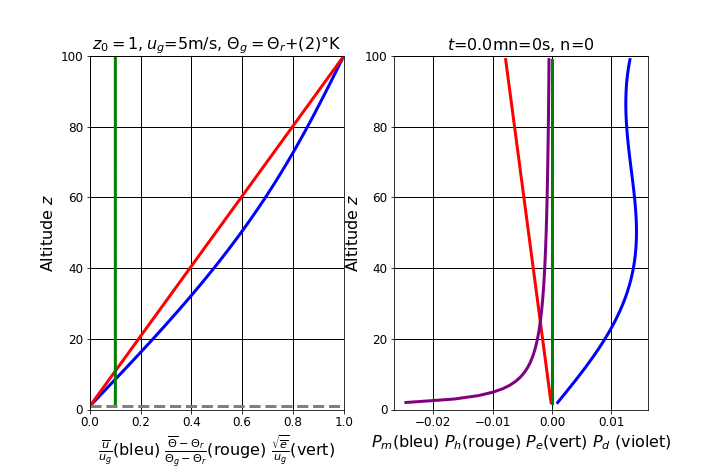

Exécutez cette première partie du code pour définir les fonctions ! 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def inifig(xaxe=0,yaxe=0,xlab='x',ylab='y'):
    plt.figure(2)
    plt.axvline(xaxe)
    plt.axhline(yaxe)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=16 )
    plt.ylabel(ylab,fontsize=16)
    
def zfi(x,le=3):
    miss=le-len(str(x))
    a='0'*miss+str(x)
    return a  
    
def Futhe(u,th,e):
    dudz=(u[1:]-u[:-1])/dz
    dthdz=(th[1:]-th[:-1])/dz
    dedz=(e[1:]-e[:-1])/dz
    lK=k*.5*(z[:-1]+z[1:]);
    l=k*z[1:-1];
    K=lK*np.sqrt(.5*(e[:-1]+e[1:]));

    Km=cm*K; Kh=ch*K; Ke=ce*K;
    wu=-Km*dudz
    wth=-Kh*dthdz
    wpwe=-Ke*dedz

    Fu=-(wu[1:]-wu[:-1])/dz
    Fth=-(wth[1:]-wth[:-1])/dz
    Pm=-.5*(wu[:-1]+wu[1:])*.5*(dudz[:-1]+dudz[1:])
    Ph=gsthr*.5*(wth[:-1]+wth[1:])
    Pe=-(wpwe[1:]-wpwe[:-1])/dz
    Pd=-cd*e[1:-1]**1.5/l
    Fe=Pm+Ph+Pe+Pd
    
    return Fu,Fth,Fe,Pm,Ph,Pe,Pd,dudz,dthdz,wu,wth
    
def advance(u,th,e):
    ifilm=0
    for n in range(Nt):
        Fu,Fth,Fe,Pm,Ph,Pe,Pd,dudz,dthdz,wu,wth=Futhe(u,th,e)
        u[1:-1]=u[1:-1]+dt*Fu
        th[1:-1]=th[1:-1]+dt*Fth
        e[1:-1]=e[1:-1]+dt*Fe
        e[0]=e[1]; e[-1]=e[-2];
        e=np.maximum(e,0)

        if n%nplot==0:
            print("ifilm=",ifilm)
            t=n*dt; tmn=round(t/60,1);
            plt.figure(1,figsize=(10,6.5))
            plt.title(r'$u_g$='+zfi(ug,1)+'m/s, $\Theta_g=\Theta_r+($'+zfi(thg-thr,2)+\
            r')°K, $t$='+zfi(tmn,2)+"mn, n="+zfi(n,0),fontsize=16)
            # Profils
            plt.subplot(121)
            plt.title(r'$z_0=$'+zfi(z0,1)+
            r'$, u_g$='+zfi(ug,1)+r'm/s, $\Theta_g=\Theta_r$+('
            +zfi(round(thg-thr,1),1)+r')°K',fontsize=16)
            plt.grid(color='black', axis='y', linestyle='-', linewidth=1)        
            plt.grid(color='black', axis='x', linestyle='-', linewidth=1)        
            plt.ylabel(r'Altitude $z$',fontsize=16)    
            plt.ylim(0,H)          
            plt.xticks(fontsize=12)
            plt.yticks(fontsize=12)
            plt.xlabel(r'$\frac{\overline{u}}{u_g}$(bleu) '+
            r'$\frac{\overline{\Theta}-\Theta_r}{\Theta_g -\Theta_r}$(rouge) '+
            r'$\frac{\sqrt{\overline{e}}}{u_g}$(vert)',fontsize=16)
            plt.xlim(xmin,xmax)
            plt.plot(u/ug,z,linewidth=3,color='blue')
            plt.plot((th-thr)/(thg-thr),z,linewidth=3,color='red')
            plt.plot(np.sqrt(e)/ug,z,linewidth=3,color='green')
            plt.plot([0,1],[z0,z0],"--",linewidth=3,color='grey')
            # Productions TKE
            plt.subplot(122)
            plt.title(r'$t$='+zfi(tmn,1)+"mn="+zfi(round(t),0)+"s, n="+zfi(n,0),fontsize=16)
            plt.grid(color='black', axis='y', linestyle='-', linewidth=1)        
            plt.grid(color='black', axis='x', linestyle='-', linewidth=1)        
            plt.ylabel(r'Altitude $z$',fontsize=16)    
            plt.ylim(0,H)          
            plt.xticks(fontsize=12)
            plt.yticks(fontsize=12)
            plt.xlabel(r'$P_m$(bleu) $P_h$(rouge) $P_e$(vert) $P_d$ (violet)',fontsize=16)
            zz=z[1:-1]
            plt.plot(Pm,zz,linewidth=3,color='blue')
            plt.plot(Ph,zz,linewidth=3,color='red')
            plt.plot(Pe,zz,linewidth=3,color='green')
            plt.plot(Pd,zz,linewidth=3,color='purple')
            plt.show()
            ifilm=ifilm+1
            
    return u,th,e,ifilm

Les paramètres suivants de la simulation peuvent être modifiés : 
*   $H$ : hauteur de la couche de limite de surface (défaut=100)
*   $z_0$ : hauteur de rugosité (défaut=1)
*   $u_g$ : vitesse au sommet (défaut=5)
*   $N_z$ : nombre de points de grille (défaut=101)
*   stable ou instable
*   $\theta_g=\Theta_g-273$_K : température au sommet (°C)
*   Ndix : Nombre de dizaines de minutes à simuler (défaut=40)
*   usdt : inverse du pas de temps (défaut=240)
*   Élément de liste

Exécutez le programme ci-dessous et placez-vous en bas de la page pour voir l'animation !

Ri= -2.6785
ifilm= 0


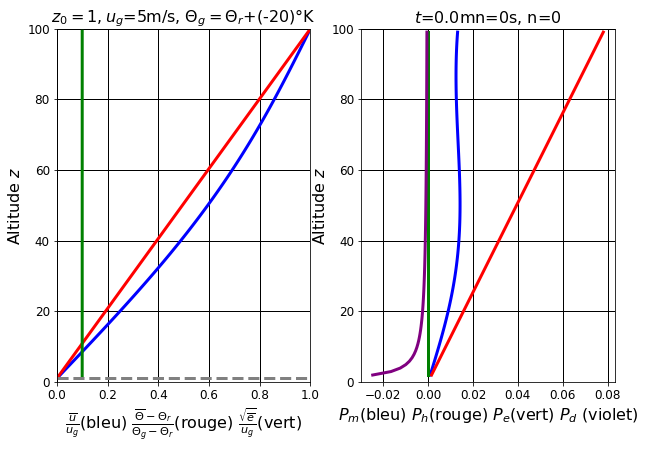

ifilm= 1


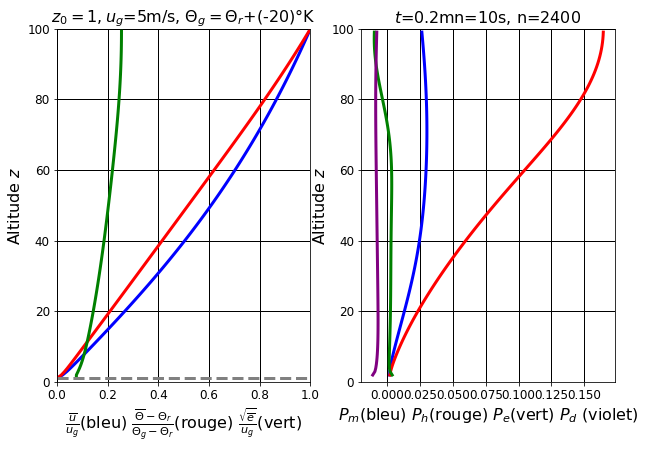

ifilm= 2


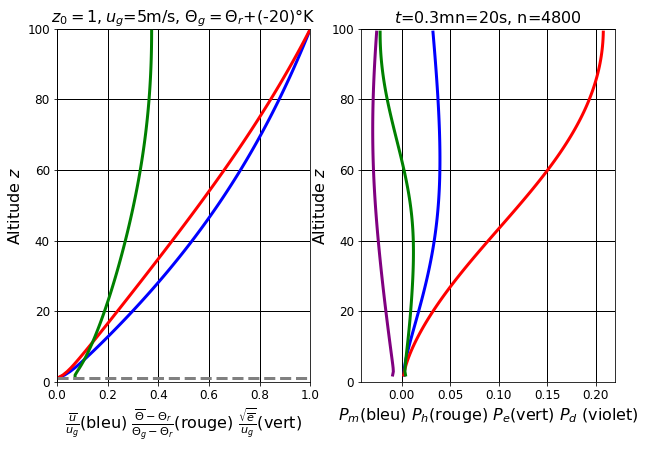

ifilm= 3


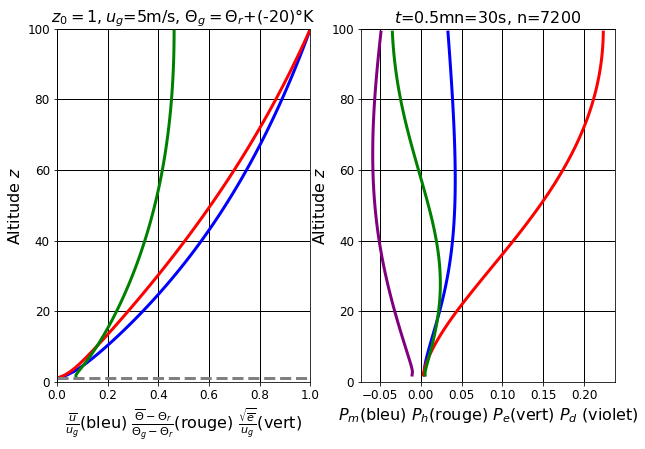

ifilm= 4


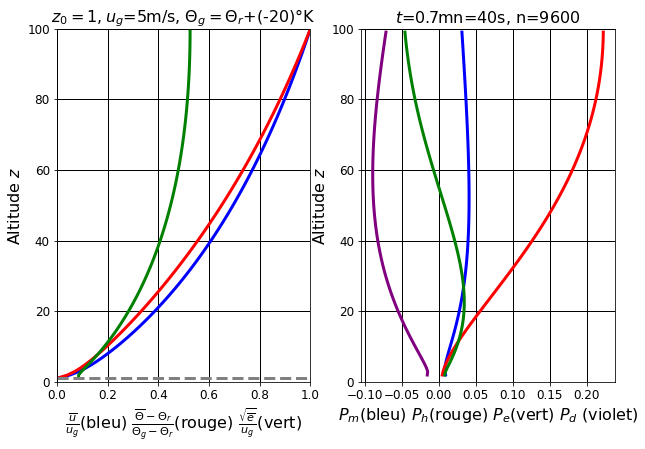

ifilm= 5


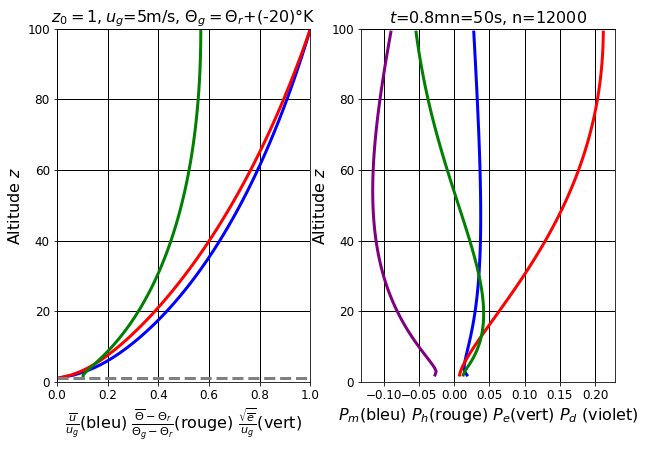

ifilm= 6


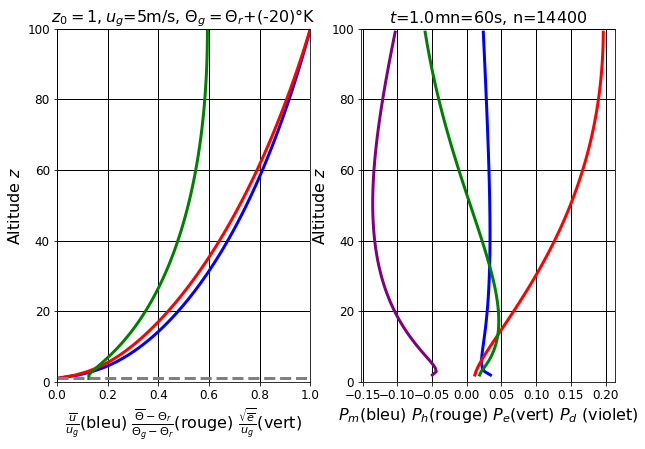

ifilm= 7


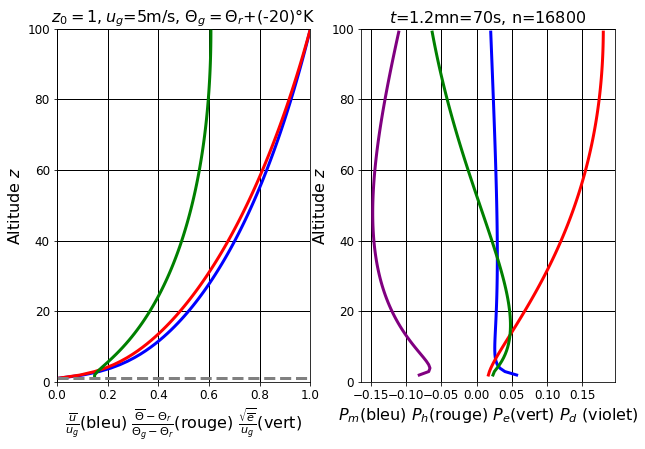

ifilm= 8


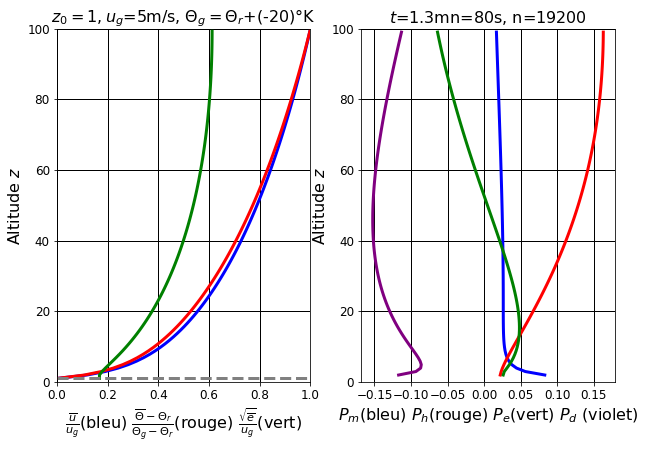

ifilm= 9


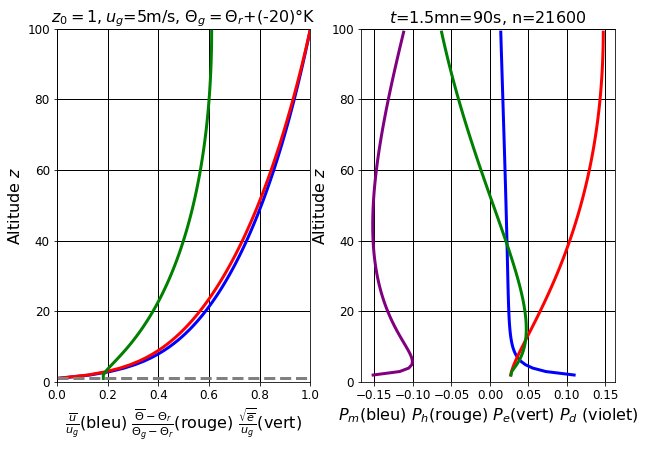

ifilm= 10


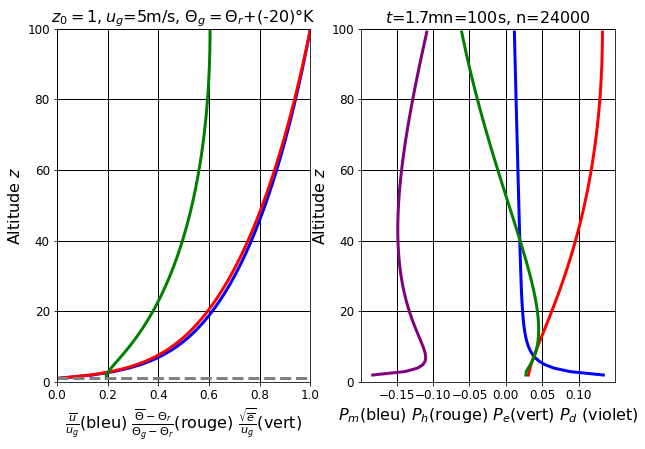

ifilm= 11


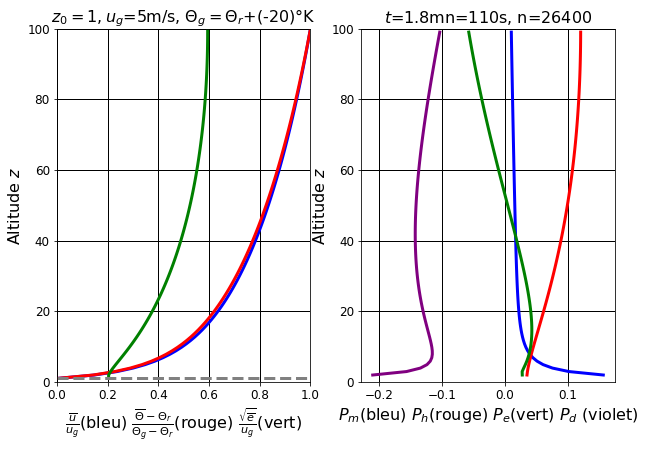

ifilm= 12


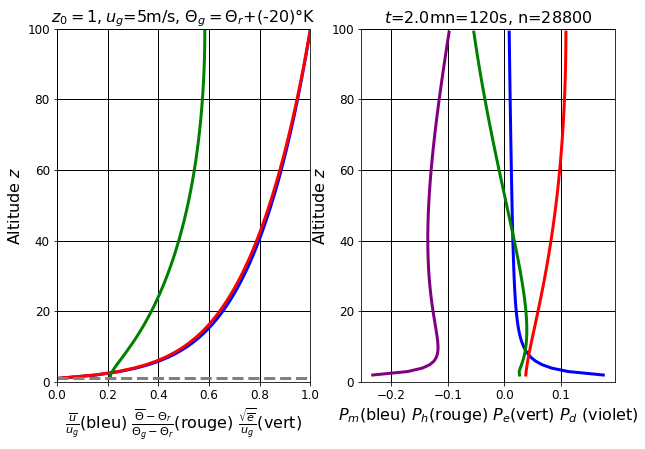

ifilm= 13


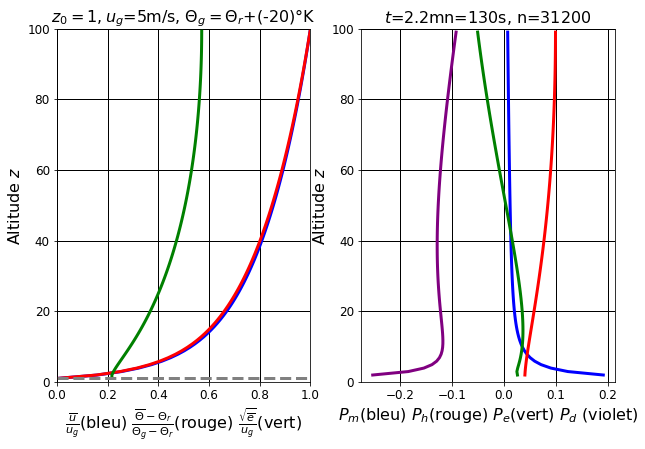

ifilm= 14


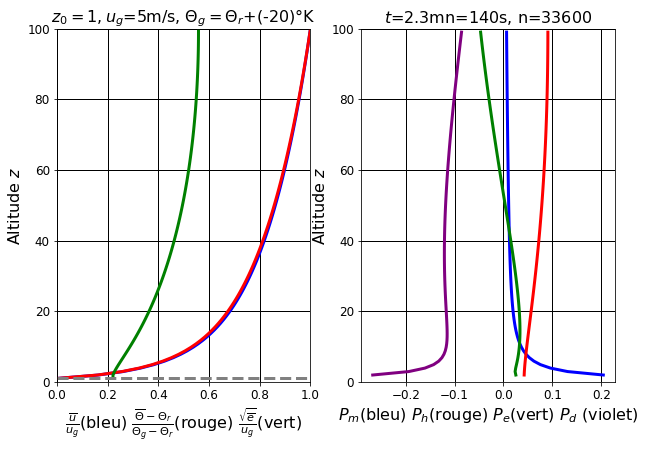

ifilm= 15


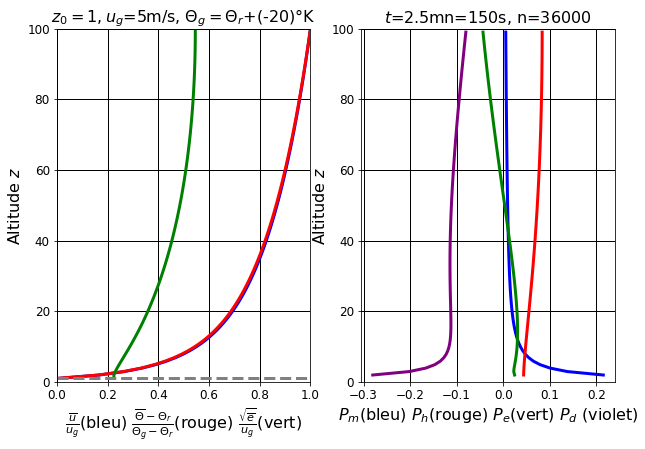

ifilm= 16


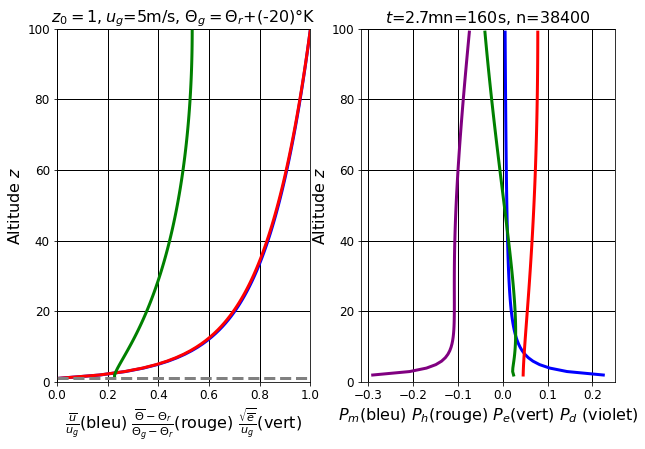

ifilm= 17


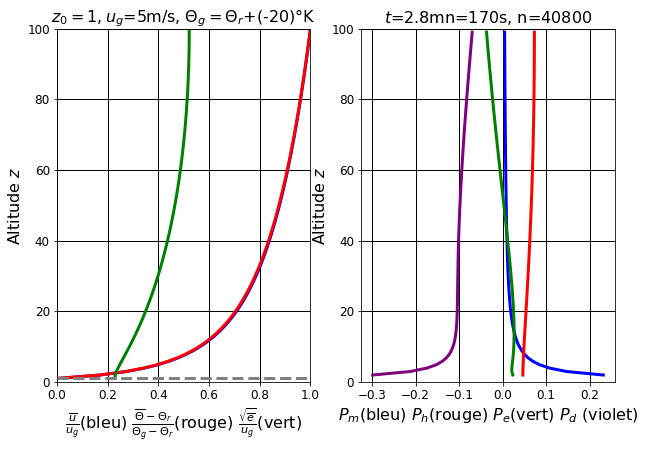

ifilm= 18


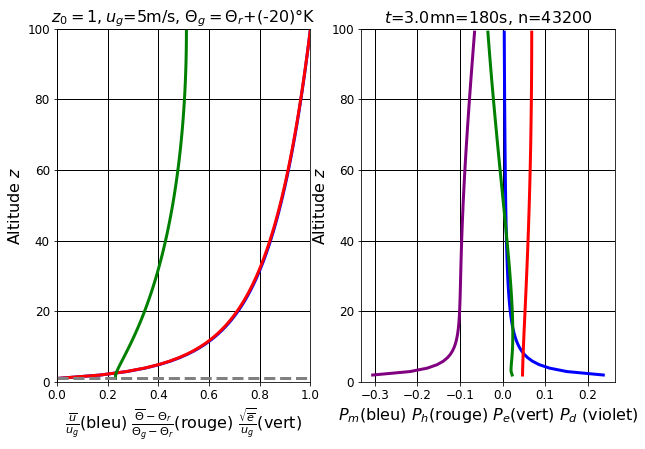

ifilm= 19


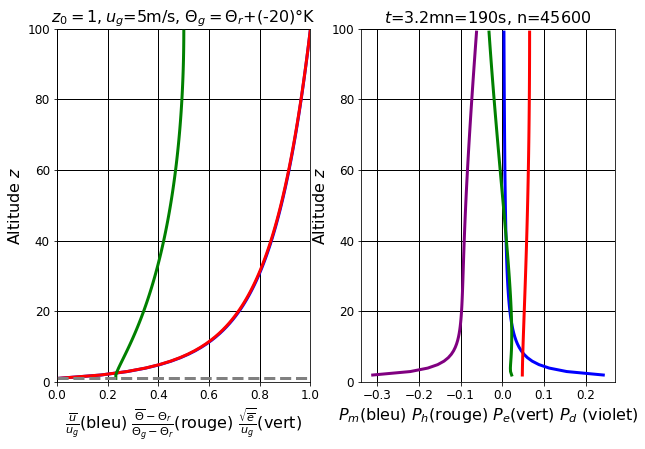

ifilm= 20


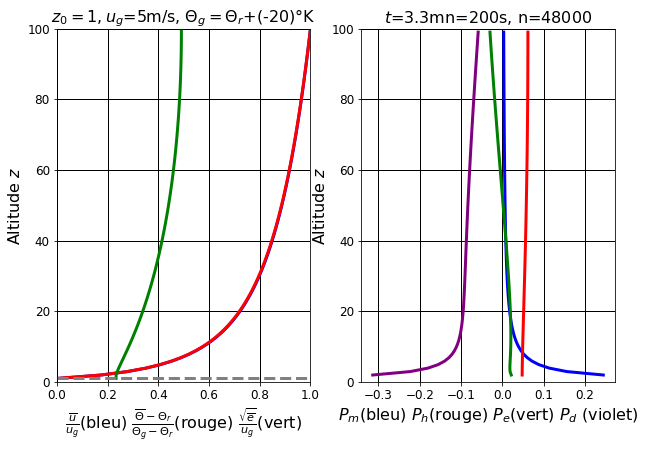

ifilm= 21


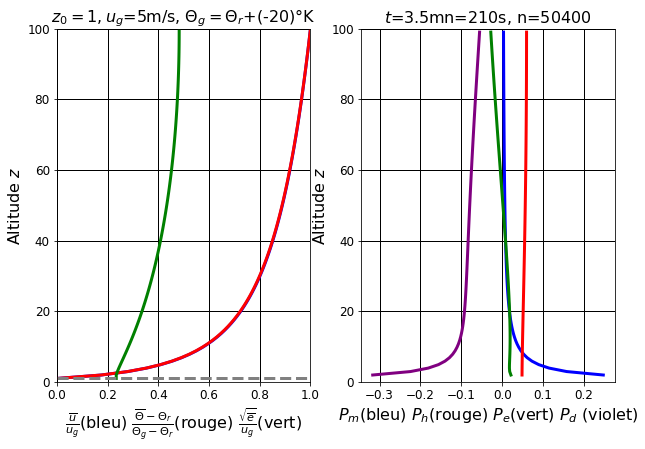

ifilm= 22


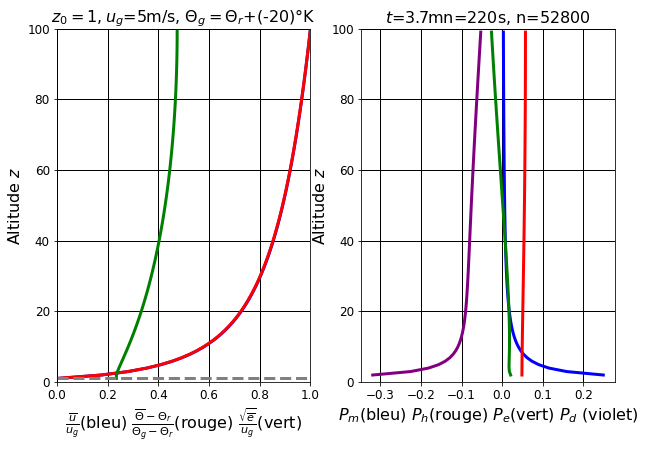

ifilm= 23


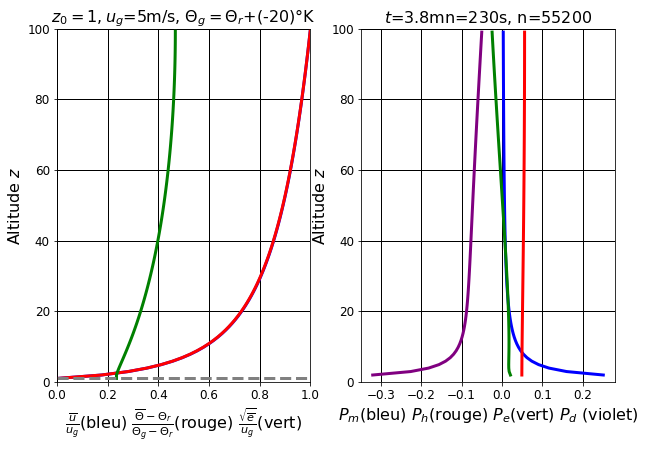

ifilm= 24


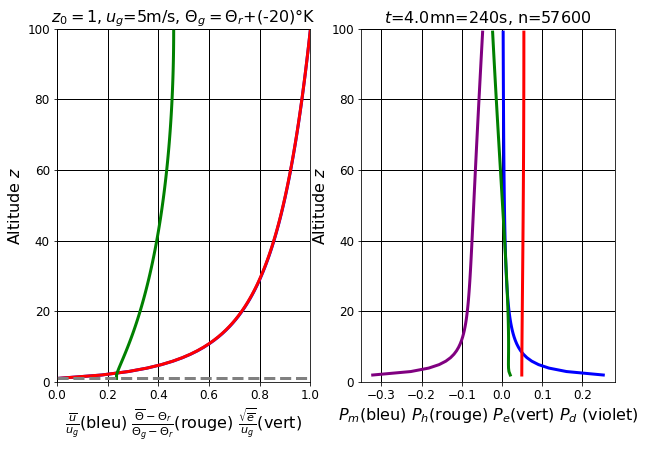

ifilm= 25


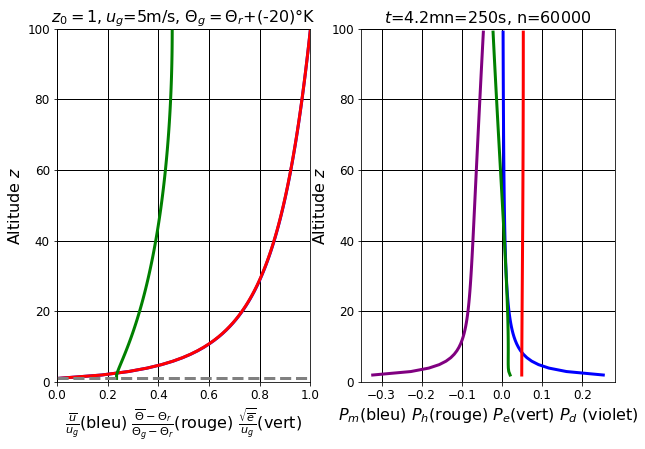

ifilm= 26


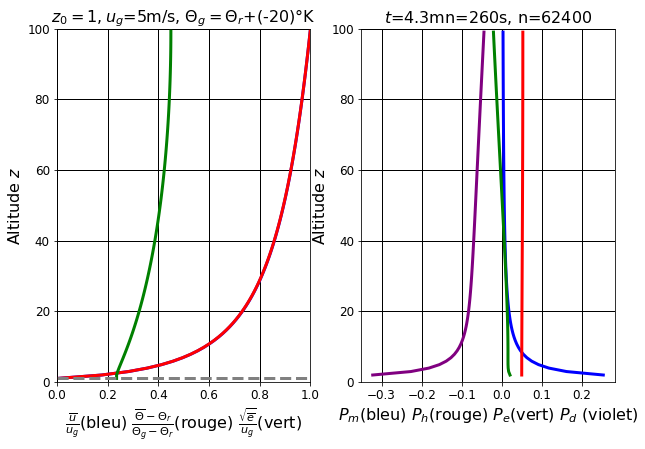

ifilm= 27


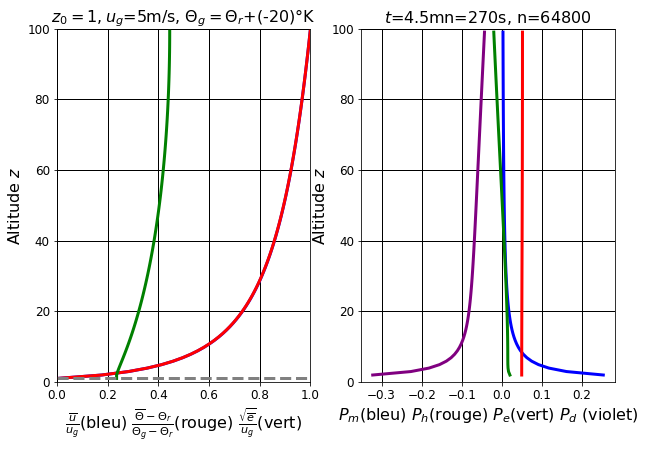

ifilm= 28


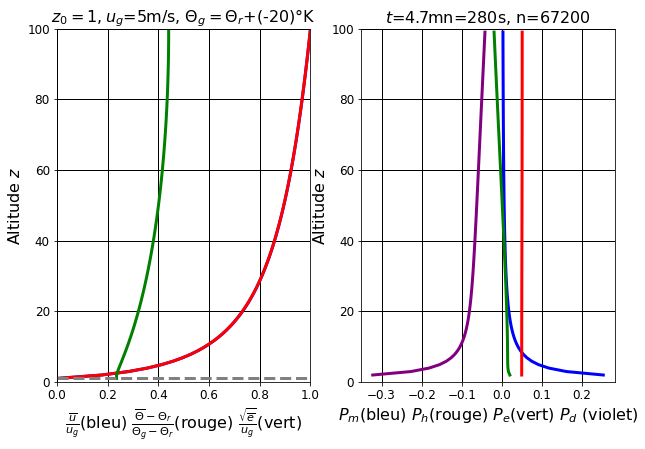

ifilm= 29


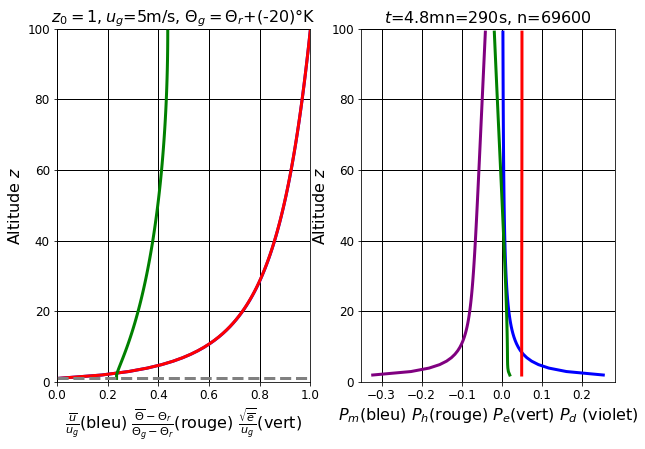

ifilm= 30


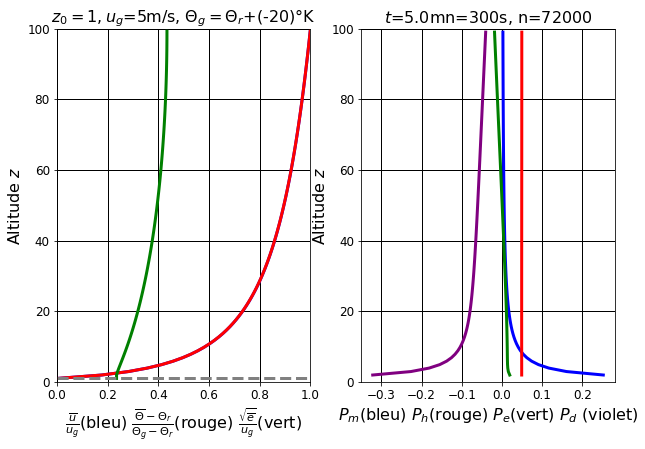

ifilm= 31


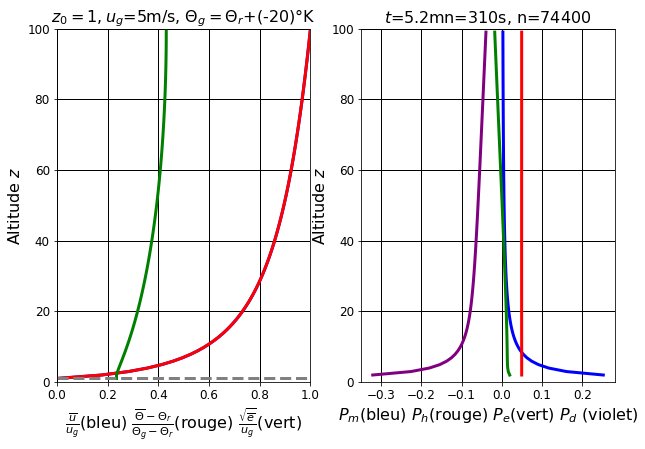

ifilm= 32


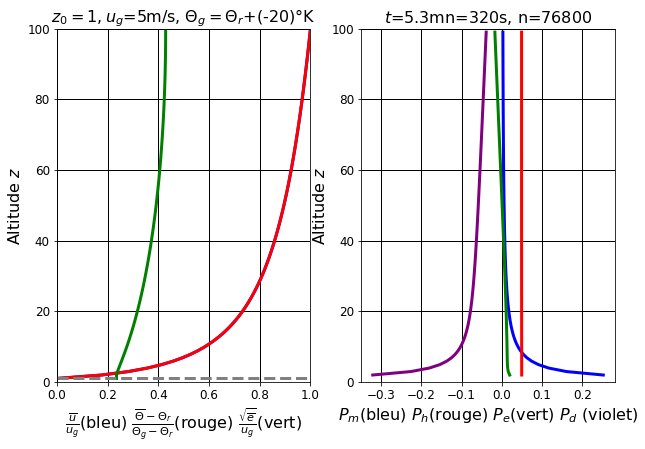

ifilm= 33


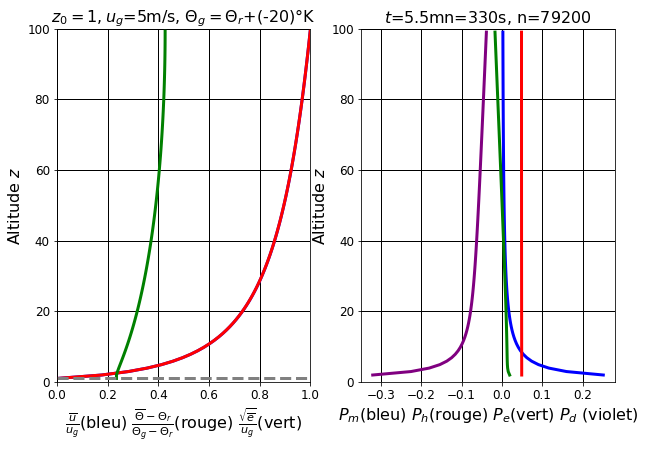

ifilm= 34


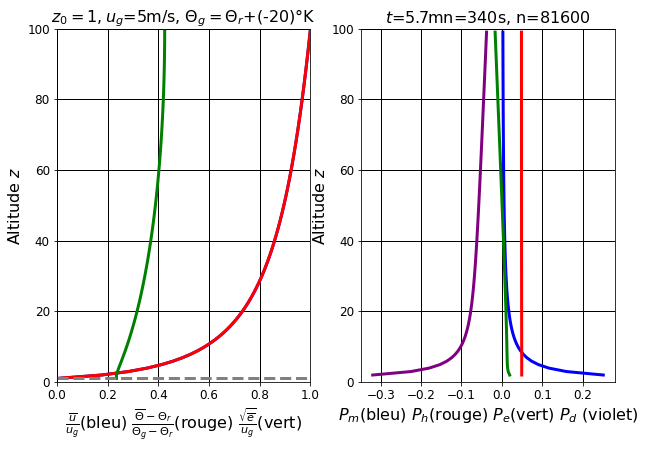

ifilm= 35


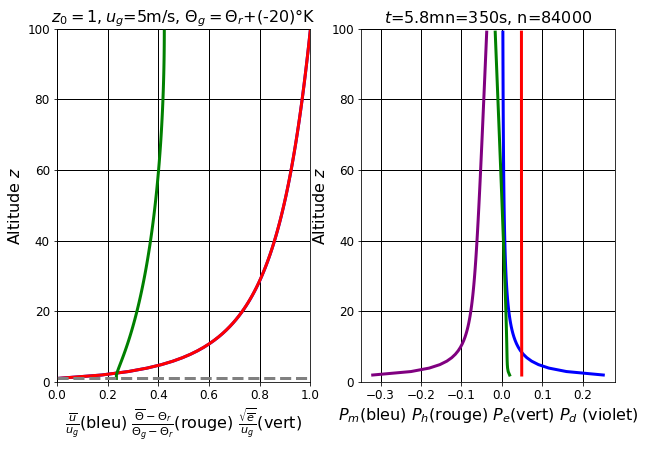

ifilm= 36


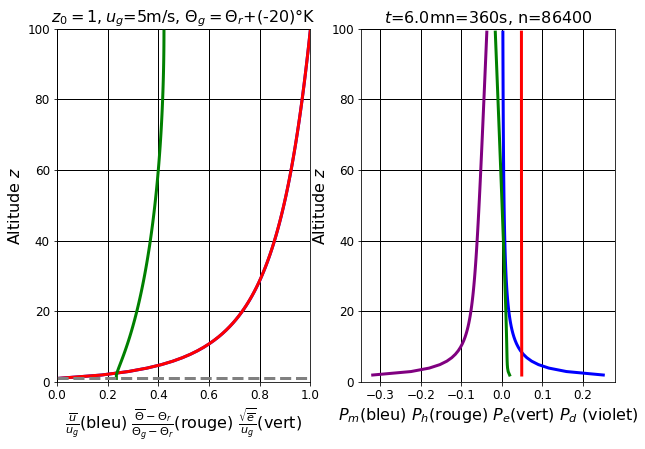

ifilm= 37


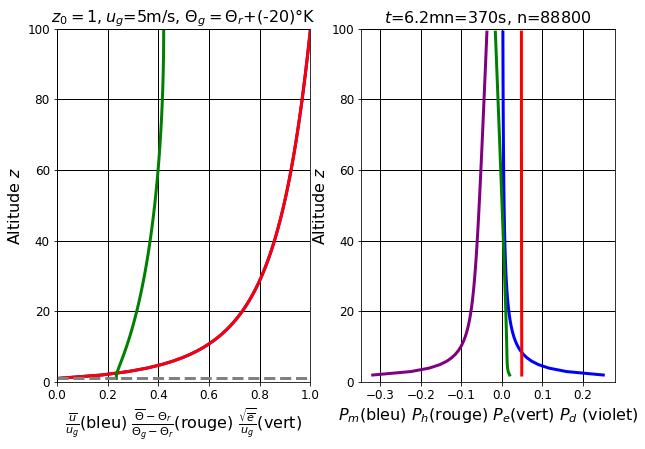

ifilm= 38


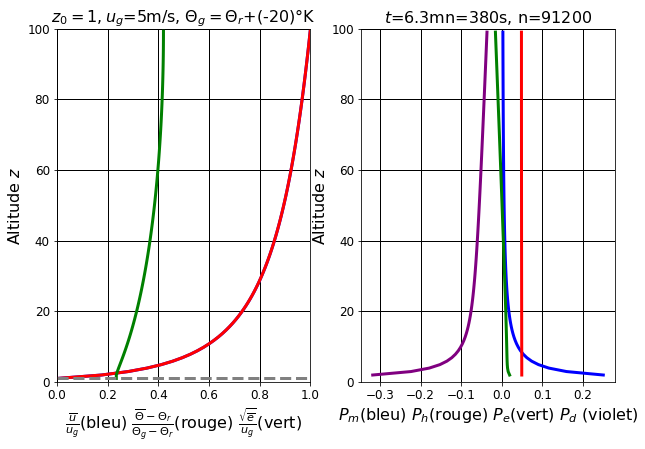

ifilm= 39


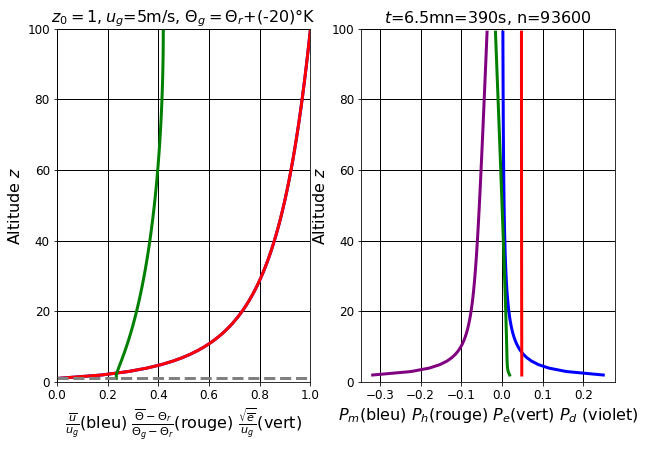

L= -10.197688275395977 us= 0.5891849177674201 273+ths= 270.52020222450125


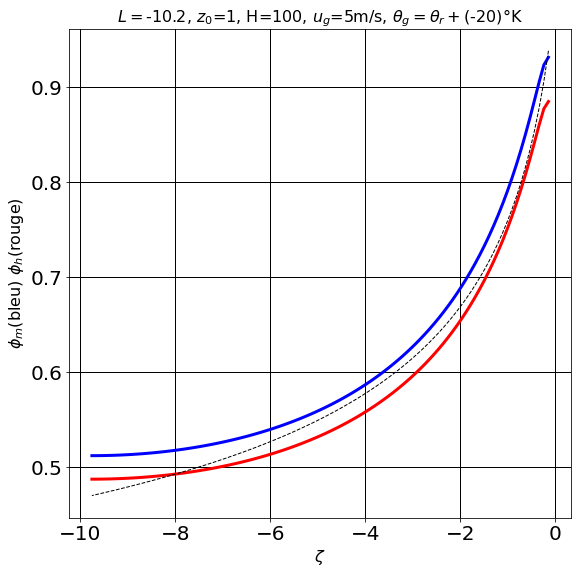

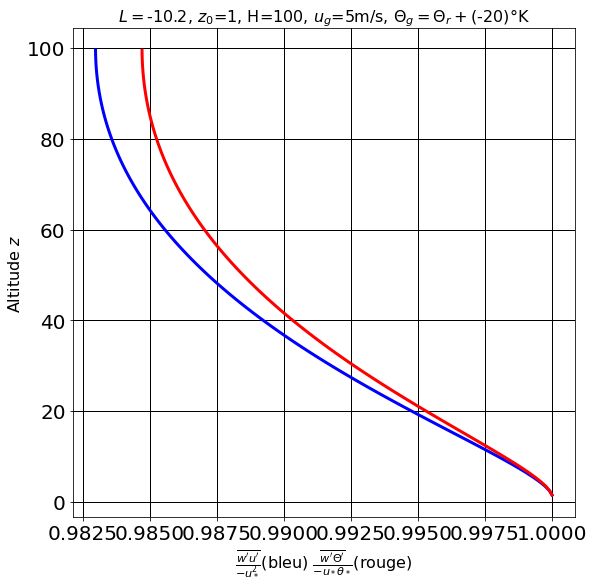

In [ ]:
H=100; z0=1; ug=5; thr=20; en0=.01
g=9.81; gsthr=g/(273+thr);
k=0.41; Pr=.95; sigr=1.66; 
cm=.54; ch=cm/Pr; ce=cm/sigr; cd=.16;

# Space
Nz=101; 
z=np.linspace(z0,H,Nz+1); dz=(H-z0)/Nz; 

# Plot des profils adimensionnes
xmin=0; xmax=1; 

# Control of the simulation
T=True; F=False
instable=T; stable=F
# instable
per=.1*np.sin(np.pi*(z-z0)/(H-z0))
if instable:
    thg=10; 
    thg=0;
    Ndix=40
    usdt=240; unit=10; nplot=1*unit*usdt; Nt=Ndix*nplot;
    #u0=ug*np.log(z/z0)/np.log(H/z0)+ug*per
    #th0=thr+(thg-thr)*np.log(z/z0)/np.log(H/z0)
    u0=ug*(z-z0)/(H-z0)+ug*per
    th0=thr+(z-z0)/(H-z0)*(thg-thr)
    Dth=round(thg-thr,2)
    Ri=round(g*H*(thg-thr)/(ug**2*(273+thr)),4); print("Ri=",Ri)

# stable
if stable:
    thg=24; 
    thg=22; 
    Ndix=40
    usdt=240; unit=10; nplot=1*unit*usdt; Nt=Ndix*nplot;
    u0=ug*(z-z0)/(H-z0)+ug*per
    th0=thr+(z-z0)/(H-z0)*(thg-thr)
    #u0=ug*np.log(z/z0)/np.log(H/z0)+ug*per
    #th0=thr+(thg-thr)*np.log(z/z0)/np.log(H/z0)
    Ri=round(g*H*(thg-thr)/(ug**2*(273+thr)),4); print("Ri=",Ri)
    Dth=round(thg-thr,2)

# Pas de temps
dt=1/usdt; 

# energie cinetique turbulente initiale
e0=en0*ug**2+0*z

# initial condition
u=u0.copy()
th=th0.copy()
e=e0.copy()

# Loop
u,th,e,ifilm=advance(u,th,e)

## Businger-Dryer
Fu,Fth,Fe,Pm,Ph,Pe,Pd,dudz,dthdz,wu,wth=Futhe(u,th,e)
us2=-wu[0]
us=np.sqrt(us2)
ths=-wth[0]/us
L=us2*(273+thr)/(k*g*ths); 
print("L=",L,"us=",us,"273+ths=",273+ths)

zh=.5*(z[:-1]+z[1:])
Phim=k*zh*dudz/us
Phih=k*zh*dthdz/ths

plt.figure(2,figsize=(9,9))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(r'$L=$'+zfi(round(L,1),0)+r', $z_0$='
  +zfi(round(z0),0)+r', H='+zfi(round(H),0)+r', $u_g$='
  +zfi(ug,1)+r'm/s, $\theta_g=\theta_r+($'
  +zfi(round(thg-thr,1),1)+')°K',fontsize=16)
plt.grid(color='black', axis='y', linestyle='-', linewidth=1)        
plt.grid(color='black', axis='x', linestyle='-', linewidth=1)        
plt.ylabel(r'$\phi_m$(bleu) $\phi_h$(rouge)',fontsize=16)              
plt.xlabel(r'$\zeta$',fontsize=16)
zeta=zh/L
plt.plot(zeta,Phim,linewidth=3,color='blue')
plt.plot(zeta,Phih,linewidth=3,color='red')
if stable:
    plt.plot(zeta,1+.4*zeta,'--',linewidth=1,color='black')
if instable:
    plt.plot(zeta,1/(1-2*zeta)**.25,'--',linewidth=1,color='black')
plt.show()

## Flux
plt.figure(3,figsize=(9,9))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(r'$L=$'+zfi(round(L,1),0)+r', $z_0$='+zfi(round(z0),0)
    +r', H='+zfi(round(H),0)+r', $u_g$='+zfi(ug,1)
    +r'm/s, $\Theta_g=\Theta_r+($'
    +zfi(round(thg-thr,1),1)+')°K',fontsize=16)
plt.grid(color='black', axis='y', linestyle='-', linewidth=1)        
plt.grid(color='black', axis='x', linestyle='-', linewidth=1)        
plt.xlabel(r"$\frac{\overline{w'u'}}{-u_*^2}$(bleu) $\frac{\overline{w'\Theta'}}{-u_*\theta_*}$(rouge)",fontsize=16)              
plt.ylabel(r'Altitude $z$',fontsize=16)
zeta=zh/L
plt.plot(-wu/us2,zh,linewidth=3,color='blue')
plt.plot(-wth/(us*ths),zh,linewidth=3,color='red')
plt.show()
